
# **Análisis de tendencias musicales en Spotify**

Este proyecto analiza un dataset de canciones de Spotify para responder preguntas clave como:
- ¿Qué características tienen las canciones más populares?
- ¿Cómo han cambiado las características musicales a lo largo del tiempo?
- ¿Qué canciones recomendar según el estado de ánimo?

### Herramientas utilizadas
- **Librerías**: pandas, matplotlib, seaborn
- **Dataset**: history-of-rock-spotify - Copy.csv

---

# Primero agrego mis librerias (Siempre agrego todas por costumbre)

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib as mp
import sqlite3 as sq
import matplotlib.pyplot as plt
import numpy as np

# Vizualisacion de Data Frame

In [3]:
df_Rock = pd.read_csv(f'/Users/ing.jorge/Trabajo/Portafolio/Rock/history-of-rock-spotify - Copy.csv')
df_Rock.head(2)


,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.106,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.116,-12.049,0.0339,82.433,4,0.197


# Organizado por popularidad mayor a 83, para filtrar informacion

In [4]:
df_rock_populares=df_Rock[df_Rock['popularity'] >= 80].sort_values(by='popularity', ascending=False)
df_rock_populares.head(5)

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
1116,1116,The Scientist,Coldplay,2002,5.160000,84,0.557,0.73100,0.557,0.442,0.000015,5,0.1100,-7.224,0.0243,146.277,4,0.213
2619,2619,Jingle Bell Rock,Bobby Helms,1992,2.182883,84,0.754,0.64300,0.754,0.424,0.000000,2,0.0652,-8.463,0.0363,119.705,4,0.806
2153,2153,Pumped Up Kicks,Foster The People,2011,3.993333,84,0.733,0.14500,0.733,0.710,0.115000,5,0.0956,-5.849,0.0292,127.975,4,0.965
16,16,Back In Black,AC/DC,1980,4.258217,84,0.310,0.01100,0.310,0.700,0.009650,9,0.0828,-5.678,0.0470,188.386,4,0.763
85,85,In the End,Linkin Park,2000,3.614667,84,0.556,0.00958,0.556,0.864,0.000000,3,0.2090,-5.870,0.0584,105.143,4,0.400


In [5]:
df_similitudes_mas_populares=df_rock_populares[df_rock_populares['popularity'] >= 80 ].sort_values(by='tempo', ascending=False).head(2)
df_similitudes_mas_populares

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
16,16,Back In Black,AC/DC,1980,4.258217,84,0.310,0.011,0.310,0.700,0.009650,9,0.0828,-5.678,0.0470,188.386,4,0.763
1834,1834,Mr. Blue Sky,Electric Light Orchestra,1977,5.056217,80,0.388,0.652,0.388,0.338,0.000004,10,0.2480,-10.054,0.0328,177.784,4,0.477


In [6]:
df_similitudes_menos_populares= df_Rock [df_Rock['popularity']<= 80].sort_values(by='popularity', ascending=True).head(2)
df_similitudes_menos_populares

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
5483,5483,~,Touché Amoré,2011,1.48510,0,0.222,0.000258,0.222,0.959,0.000275,6,0.154,-5.134,0.2080,161.693,4,0.128
3837,3837,Dizzy (Originally Performed by Vic Reeves & Th...,Music Factory Karaoke,2014,3.27555,0,0.558,0.000371,0.558,0.790,0.358000,7,0.232,-13.145,0.0361,114.680,4,0.821


# Comparacion de canciones menos populares con mas populares

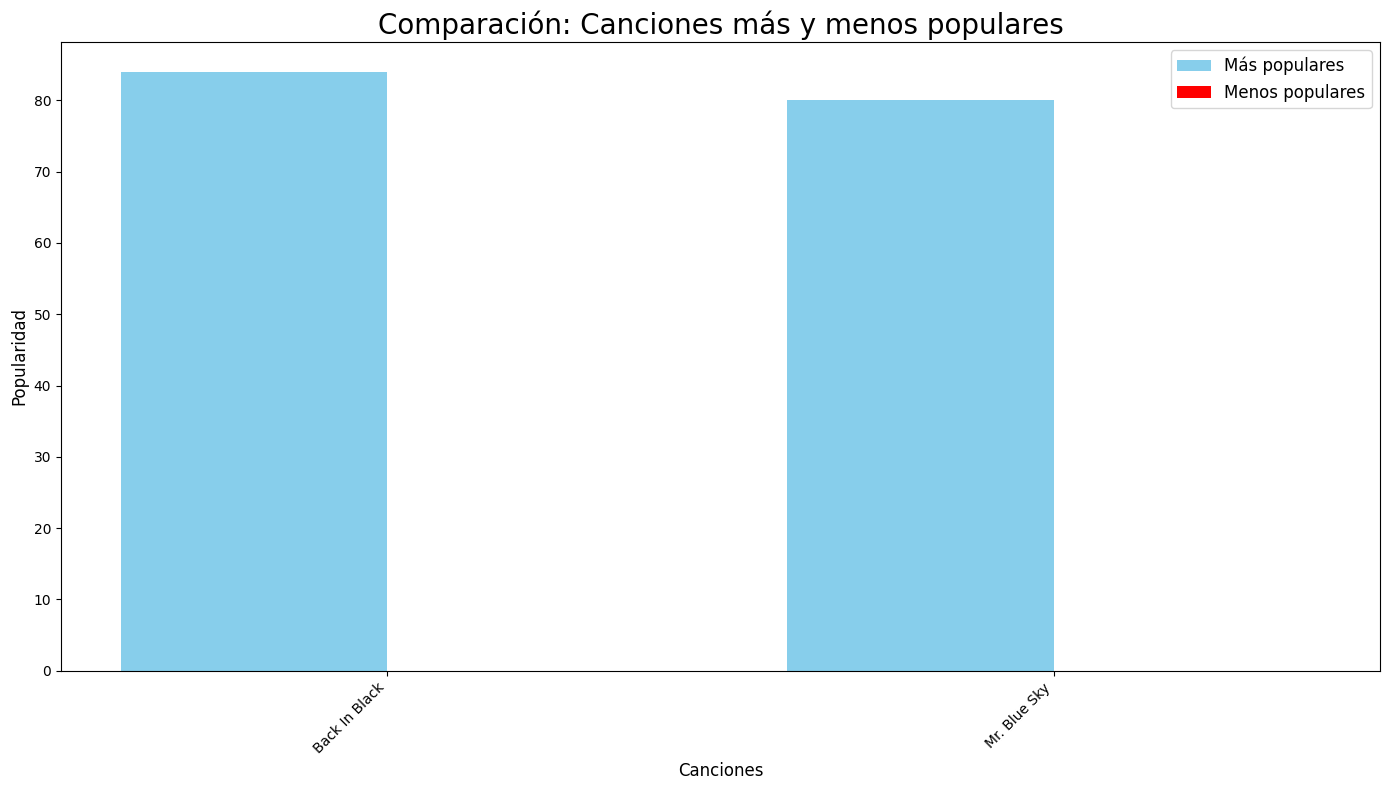

In [18]:
# Verificar si ambos DataFrames tienen la misma longitud
if len(df_similitudes_mas_populares) != len(df_similitudes_menos_populares):
    min_length = min(len(df_similitudes_mas_populares), len(df_similitudes_menos_populares))
    df_similitudes_mas_populares = df_similitudes_mas_populares.iloc[:min_length]
    df_similitudes_menos_populares = df_similitudes_menos_populares.iloc[:min_length]

# Crear un índice común para ambas categorías
indice = np.arange(len(df_similitudes_mas_populares))

# Tamaño de la gráfica
plt.figure(figsize=(14, 8))

# Barras para las canciones más populares
plt.bar(indice - 0.2, df_similitudes_mas_populares['popularity'], width=0.4, label='Más populares', color='skyblue')

# Barras para las canciones menos populares
plt.bar(indice + 0.2, df_similitudes_menos_populares['popularity'], width=0.4, label='Menos populares', color='red')

# Etiquetas y personalización
plt.xlabel('Canciones', fontsize=12)
plt.ylabel('Popularidad', fontsize=12)
plt.title('Comparación: Canciones más y menos populares', fontsize=20)
plt.xticks(indice, df_similitudes_mas_populares['name'], rotation=45, ha='right')
plt.legend(fontsize=12)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Despues de su popularidad quiero ver cual de ellas es de mas de los 2000's

In [8]:
df_es_mayor_de_los_2000=df_rock_populares[df_rock_populares['release_date'] >= 2000].sort_values(by='release_date', ascending=False)
df_es_mayor_de_los_2000

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
1226,1226,Paradise,Coldplay,2011,4.645317,80,0.449,0.050900,0.449,0.585,0.000087,5,0.0833,-6.761,0.0268,139.631,4,0.212
1242,1242,Tongue Tied,Grouplove,2011,3.633550,82,0.560,0.008470,0.560,0.936,0.000000,3,0.1610,-5.835,0.0439,112.960,4,0.371
2153,2153,Pumped Up Kicks,Foster The People,2011,3.993333,84,0.733,0.145000,0.733,0.710,0.115000,5,0.0956,-5.849,0.0292,127.975,4,0.965
172,172,Sex on Fire,Kings of Leon,2008,3.389100,80,0.542,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,0.0540,153.398,4,0.374
593,593,Viva La Vida,Coldplay,2008,4.039550,80,0.486,0.095400,0.486,0.617,0.000003,5,0.1090,-7.115,0.0287,138.015,4,0.417
4292,4292,Hey There Delilah,Plain White T's,2005,3.875550,81,0.656,0.872000,0.656,0.291,0.000000,2,0.1140,-10.572,0.0293,103.971,4,0.298
2086,2086,Fix You,Coldplay,2005,4.925550,82,0.209,0.164000,0.209,0.417,0.001960,3,0.1130,-8.740,0.0338,138.178,4,0.124
388,388,Feel Good Inc.,Gorillaz,2005,3.710667,81,0.818,0.008360,0.818,0.705,0.002330,6,0.6130,-6.679,0.1770,138.559,4,0.772
4703,4703,How to Save a Life,The Fray,2005,4.375550,81,0.640,0.269000,0.640,0.743,0.000000,10,0.1010,-4.080,0.0379,122.035,4,0.361
130,130,Bring Me To Life,Evanescence,2003,3.931550,80,0.331,0.007210,0.331,0.943,0.000002,4,0.2420,-3.188,0.0698,94.612,4,0.296


# Con esto puedo observar que la musica de menos de los 2000, es menos popular cada vez

# En este nuevo analisis quiero ver en que posicion se encuentra The Strokes con respecto a los mas populares, siendo que tambien es de los 2000's

In [9]:
df_rock_the_strokes=df_Rock[df_Rock['artist'] == 'The Strokes'].sort_values(by='popularity', ascending=False)
df_rock_the_strokes

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
2255,2255,You Only Live Once,The Strokes,2006,3.153767,70,0.630,0.02380,0.630,0.908,0.592000,11,0.1160,-2.420,0.0326,120.522,4,0.968
2555,2555,Under Cover of Darkness,The Strokes,2011,3.925767,67,0.357,0.00419,0.357,0.775,0.285000,11,0.0676,-3.364,0.0540,199.853,4,0.589
275,275,Last Nite,The Strokes,2001,3.222883,64,0.624,0.02230,0.624,0.899,0.000155,0,0.0975,-5.710,0.0295,104.055,4,0.797
2380,2380,Someday,The Strokes,2001,3.057333,64,0.538,0.00425,0.538,0.520,0.000000,9,0.3670,-7.460,0.0299,106.031,4,0.678
2030,2030,12:51,The Strokes,2003,2.552217,60,0.452,0.31200,0.452,0.889,0.800000,4,0.5580,-3.838,0.0379,145.056,4,0.591
3595,3595,Juicebox,The Strokes,2006,3.242883,59,0.462,0.00166,0.462,0.981,0.008940,2,0.0856,-2.371,0.1270,154.995,4,0.547
2630,2630,Automatic Stop,The Strokes,2003,3.450483,58,0.680,0.00336,0.680,0.536,0.737000,1,0.0884,-6.078,0.0384,105.917,4,0.959
2286,2286,Under Control,The Strokes,2003,3.119200,55,0.401,0.34100,0.401,0.723,0.775000,1,0.0543,-4.651,0.0291,90.596,4,0.660
2751,2751,The Modern Age,The Strokes,2001,3.471767,55,0.530,0.01240,0.530,0.890,0.759000,2,0.1430,-6.042,0.0328,145.958,4,0.868


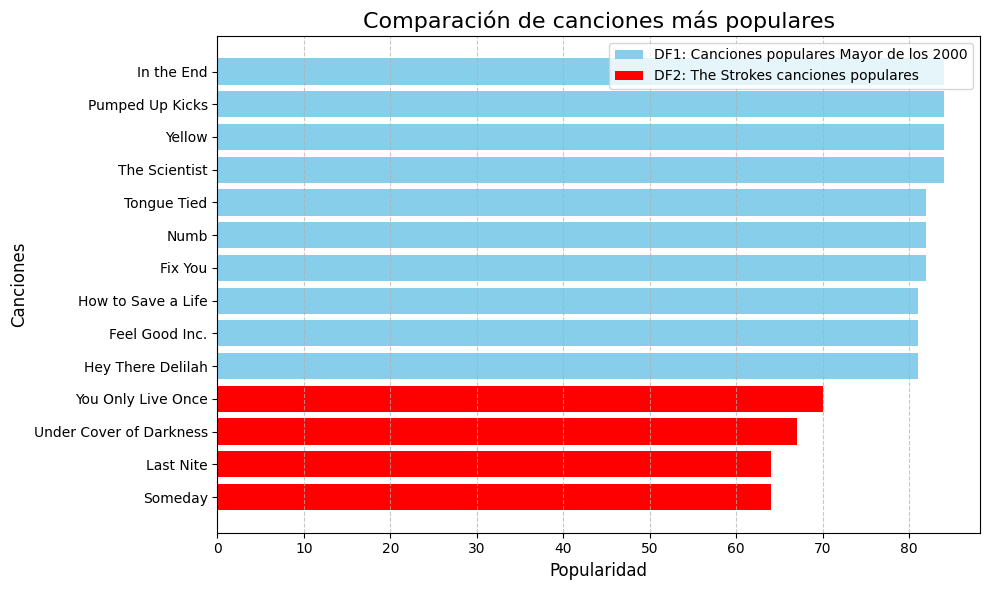

In [19]:
# Filtrar las canciones más populares de cada DataFrame
top_populares_df1 = df_es_mayor_de_los_2000.sort_values(by='popularity', ascending=False).head(10)
top_populares_df2 = df_rock_the_strokes.sort_values(by='popularity', ascending=False).head(4)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))  # Tamaño de la gráfica

# Gráfica del primer DataFrame
plt.barh(top_populares_df1['name'], top_populares_df1['popularity'], color='skyblue', label='DF1: Canciones populares Mayor de los 2000')

# Gráfica del segundo DataFrame
plt.barh(top_populares_df2['name'], top_populares_df2['popularity'], color='red', label='DF2: The Strokes canciones populares')

# Personalizar la gráfica
plt.xlabel('Popularidad', fontsize=12)
plt.ylabel('Canciones', fontsize=12)
plt.title('Comparación de canciones más populares', fontsize=16)
plt.gca().invert_yaxis()  # Invertir el orden para que las barras comiencen desde arriba
plt.legend()  # Agregar la leyenda
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Con esto se puede concluir que the strokes esta por debajo del top 4, por 15 puntos respecto a la mas popular

# Quiero ver que canciones son mas apropiadas para dormir con respecto a la energia

In [11]:
df_para_dormir=df_Rock[df_Rock['energy'] <= 0.5].sort_values ( by='energy',ascending=True)
df_para_dormir.head(5)

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
3958,3958,Another Green World - Remastered 2004,Brian Eno,1975,1.695100,40,0.171,0.795,0.171,0.00383,0.883000,1,0.0755,-21.710,0.0464,76.214,1,0.4580
3228,3228,"Paris, Texas",Ry Cooder,1995,2.912667,55,0.359,0.945,0.359,0.00681,0.158000,7,0.0581,-20.957,0.0602,128.713,5,0.2050
4819,4819,"Vermillion, Pt. 2",Twinkle Twinkle Little Rock Star,2013,4.237983,20,0.616,0.820,0.616,0.01620,0.698000,11,0.0989,-24.434,0.0399,123.982,5,0.0391
3687,3687,Rollin' Stone,Muddy Waters,1989,3.136000,52,0.629,0.989,0.629,0.01920,0.000043,4,0.1060,-19.952,0.0833,169.254,4,0.3350
750,750,Crazy - Single Version,Patsy Cline,1961,2.742883,66,0.471,0.931,0.471,0.02100,0.000001,10,0.1030,-24.385,0.0366,107.765,3,0.3560
